In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv(r"C:\\Contents\\Kaggle\\creditcardfraud\\creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df = df.sample(frac = 0.2, random_state=42)
print(df.describe())

                Time            V1            V2            V3            V4  \
count   56961.000000  56961.000000  56961.000000  56961.000000  56961.000000   
mean    94899.898246     -0.003636      0.001519      0.003689      0.005814   
std     47487.189441      1.960147      1.629984      1.523094      1.415932   
min         0.000000    -34.148234    -48.060856    -33.680984     -5.560118   
25%     54324.000000     -0.921985     -0.600888     -0.888734     -0.845894   
50%     84672.000000      0.018794      0.064370      0.182761     -0.015873   
75%    139390.000000      1.316077      0.802564      1.033631      0.749586   
max    172787.000000      2.439207     21.467203      9.382558     12.699542   

                 V5            V6            V7            V8            V9  \
count  56961.000000  56961.000000  56961.000000  56961.000000  56961.000000   
mean      -0.003953      0.002397     -0.004395      0.001600     -0.003849   
std        1.350150      1.313940      1.2

In [3]:
df.isnull().values.any()

False

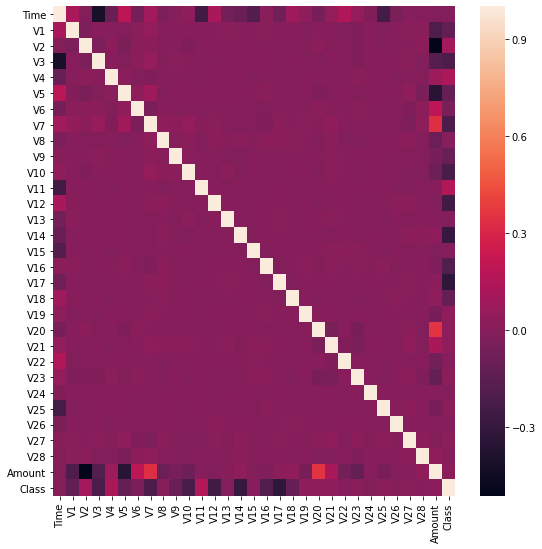

In [4]:
import seaborn as sb

fig = plt.figure(figsize=(9,9))
sb.heatmap(df.corr())
plt.show()

In [8]:
fraud = df[df.Class == 1]
valid = df[df.Class == 0]
outlier_fraction = len(fraud)/float(len(valid))
print(len(fraud), len(valid), outlier_fraction*100)

98 56863 0.17234405500940858


In [10]:
feature_col_names = [col for col in df.columns if col not in set(["Class"])]
predicted_class_names = ["Class"]

X = df[feature_col_names].values

Y = df[predicted_class_names].values


In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

isof = IsolationForest(max_samples=len(X),contamination=outlier_fraction)
isof.fit(X)
scores_pred = isof.decision_function(X)
y_pred = isof.predict(X)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y).sum()

# Run classification metrics
print('IsolationForest err : {}'.format( n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


IsolationForest err : 11201913
0.9975948455961097
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.30      0.31      0.30        98

    accuracy                           1.00     56961
   macro avg       0.65      0.65      0.65     56961
weighted avg       1.00      1.00      1.00     56961



In [13]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
y_pred = lof.fit_predict(X)
scores_pred = lof.negative_outlier_factor_


y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y).sum()

# Run classification metrics
print('LocalOutlierFactor err : {}'.format( n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

LocalOutlierFactor err : 11201913
0.9965766050455575
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.01      0.01      0.01        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

